In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# filter for warnings:
import warnings
warnings.filterwarnings('ignore')

# File path for the saved plots
file_path = os.path.join("images","")

# Study data files
mouse_metadata_path = "Mouse_metadata-Copy1.csv"
study_results_path = "Study_results-Copy1.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

# Create df with only unique mouse ids
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

#Create a grouped_df with two columns:
grouped_gf = clean_df.groupby(['Timepoint','Drug Regimen'])
mice_count = grouped_gf['Timepoint'].count()
mice_count

Timepoint  Drug Regimen
0          Capomulin       25
           Ceftamin        25
           Infubinol       25
           Ketapril        25
           Naftisol        25
                           ..
45         Placebo         11
           Propriva         7
           Ramicane        20
           Stelasyn        11
           Zoniferol       14
Name: Timepoint, Length: 100, dtype: int64

In [2]:
agg_df = clean_df.groupby(['Drug Regimen','Timepoint']).agg({'Mouse ID':'count'})
agg_df

Mouse ID
Drug Regimen Timepoint          
Capomulin    0                25
             5                25
             10               25
             15               24
             20               23
...                          ...
Zoniferol    25               16
             30               15
             35               14
             40               14
             45               14

[100 rows x 1 columns]

In [3]:
#agg_df.unstack(0).plot

<IPython.core.display.Javascript object>


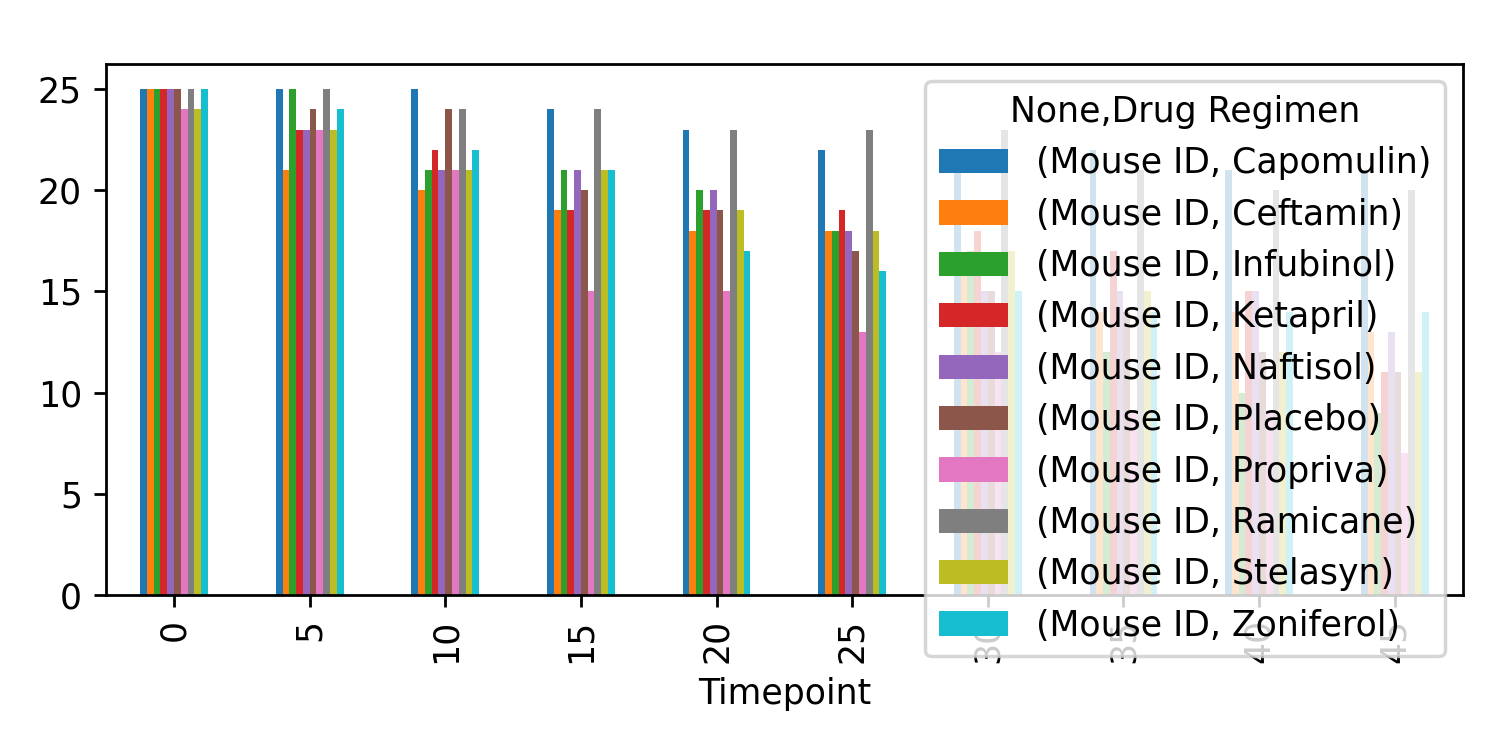

In [4]:
agg_df.unstack(0).plot(kind="bar",figsize=(6,3))
plt.tight_layout()
plt.show()
plt.savefig("agg_df_plot")